## This notebook divides the GFA dataset into 5°x5° tiles and fits both static and time-varying distributions to them.

In [1]:
import pandas as pd
import numpy as np
import os
import re
import geopandas as gpd
import sys
import pickle

sys.path.append("..")
from utils.spatial_analysis import *
from utils import wildfire_powerlaw as wfpl

In [2]:
# REPLACE WITH PATH TO GFA DATASET
folder_path = "/Users/lukevonkapff/wildfires/CMS_GFA/data"
pattern = re.compile(r"Global_fire_atlas_V1_perimeter_\d{4}")

gfa_all_data = []

for gfa_folder_name in os.listdir(folder_path):
    if pattern.match(gfa_folder_name):
        gfa_folder_path = os.path.join(folder_path, gfa_folder_name)
        if os.path.isdir(gfa_folder_path):
            gfa_shp_path = os.path.join(gfa_folder_path, gfa_folder_name + ".shp")
            if os.path.exists(gfa_shp_path):
                print(f"Processing {gfa_shp_path} ...")
                gfa_gdf = gpd.read_file(gfa_shp_path)
                
                gfa_gdf = gfa_gdf.set_crs("EPSG:4326")
                gfa_gdf = gfa_gdf.to_crs("EPSG:6933")
                
                gfa_gdf["area_km2"] = gfa_gdf.geometry.area / 1e6
                gfa_gdf["perim_km"] = gfa_gdf.geometry.length / 1000

                gfa_year = int(re.search(r"\d{4}", gfa_folder_name).group())
                gfa_gdf["YEAR"] = gfa_year
                gfa_all_data.append(gfa_gdf)

gfa_all = pd.concat(gfa_all_data, ignore_index=True)

gfa_all.head()

Processing /Users/lukevonkapff/wildfires/CMS_GFA/data/Global_fire_atlas_V1_perimeter_2005/Global_fire_atlas_V1_perimeter_2005.shp ...
Processing /Users/lukevonkapff/wildfires/CMS_GFA/data/Global_fire_atlas_V1_perimeter_2004/Global_fire_atlas_V1_perimeter_2004.shp ...
Processing /Users/lukevonkapff/wildfires/CMS_GFA/data/Global_fire_atlas_V1_perimeter_2003/Global_fire_atlas_V1_perimeter_2003.shp ...
Processing /Users/lukevonkapff/wildfires/CMS_GFA/data/Global_fire_atlas_V1_perimeter_2010/Global_fire_atlas_V1_perimeter_2010.shp ...
Processing /Users/lukevonkapff/wildfires/CMS_GFA/data/Global_fire_atlas_V1_perimeter_2016/Global_fire_atlas_V1_perimeter_2016.shp ...
Processing /Users/lukevonkapff/wildfires/CMS_GFA/data/Global_fire_atlas_V1_perimeter_2011/Global_fire_atlas_V1_perimeter_2011.shp ...
Processing /Users/lukevonkapff/wildfires/CMS_GFA/data/Global_fire_atlas_V1_perimeter_2006/Global_fire_atlas_V1_perimeter_2006.shp ...
Processing /Users/lukevonkapff/wildfires/CMS_GFA/data/Global_f

fire_ID      lat      lon   size  perimeter  start_date  start_DOY  \
0        1  19.9354 -155.705  62.17      64.82  2005-07-22        203   
1        2  43.0979 -123.995   0.86       5.56  2005-11-24        328   
2        3  43.0938 -123.941   0.43       2.78  2005-11-24        328   
3        4  43.0854 -124.004   0.21       1.85  2005-11-24        328   
4        5  43.0812 -123.961   0.43       2.78  2005-11-21        325   

     end_date  end_DOY  duration  ...  speed  direction  direction_s  \
0  2005-08-06      218        16  ...   6.01          1        north   
1  2005-11-24      328         1  ...   0.77          0         none   
2  2005-11-27      331         4  ...   0.31          7         west   
3  2005-11-24      328         1  ...   0.46          0         none   
4  2005-11-24      328         4  ...   0.31          3         east   

   landcover                  landcover_s  tile_ID  \
0          7              Open shrublands   h03v07   
1          1  Evergreen Needleleaf forest   h08v04   
2          1  Evergreen Needleleaf forest   h08v04   
3          5                 Mixed forest   h08v04   
4          1  Evergreen Needleleaf forest   h08v04   

                                            geometry   area_km2   perim_km  \
0  POLYGON ((-15029145.629 2501271.862, -15022728...  62.069552  70.001899   
1  POLYGON ((-11965053.426 5004764.252, -11963401...   0.860164   8.016190   
2  POLYGON ((-11960385.339 5004373.68, -11959284....   0.430082   4.007331   
3  POLYGON ((-11965914.384 5003592.457, -11965363...   0.215040   2.906426   
4  POLYGON ((-11961797.83 5003201.806, -11960696....   0.430081   4.006481   

   YEAR  
0  2005  
1  2005  
2  2005  
3  2005  
4  2005  

[5 rows x 22 columns]

Divide GFA global data into 5x5° grid cells. For each cell that has >400 fires of a given land cover type, run the fitting routine statically.

In [3]:
results_gfa = analyze_gfa_by_grid(gfa_all, xmin=4, R=25, min_n=400, random_state=42)

save_path = "../data/gfa_spatial_static_by_biome.pkl"
with open(save_path, "wb") as f:
    pickle.dump(results_gfa, f)
    
results_gfa


=== Barren or sparsely vegetated @ box (-40.0, -75.0) (n=469) ===
there are 2 points above xmin 4.0 km^2

=== Barren or sparsely vegetated @ box (-35.0, -70.0) (n=435) ===
there are 38 points above xmin 4.0 km^2

=== Barren or sparsely vegetated @ box (10.0, 40.0) (n=537) ===
there are 53 points above xmin 4.0 km^2

=== Barren or sparsely vegetated @ box (25.0, 35.0) (n=477) ===
there are 37 points above xmin 4.0 km^2

=== Barren or sparsely vegetated @ box (25.0, 55.0) (n=436) ===
there are 29 points above xmin 4.0 km^2

=== Barren or sparsely vegetated @ box (30.0, 35.0) (n=629) ===
there are 26 points above xmin 4.0 km^2

=== Barren or sparsely vegetated @ box (30.0, 45.0) (n=3942) ===
there are 386 points above xmin 4.0 km^2

=== Closed shrublands @ box (-30.0, -60.0) (n=847) ===
there are 13 points above xmin 4.0 km^2

=== Closed shrublands @ box (-25.0, -60.0) (n=817) ===
there are 21 points above xmin 4.0 km^2

=== Closed shrublands @ box (-5.0, 15.0) (n=414) ===
there are 3 po

{'Barren or sparsely vegetated': {(np.float64(-40.0),
   np.float64(-75.0)): {'params':                                p1         p1_se        p2         p2_se  \
   distribution                                                              
   exponential              1.379890  5.356397e+00       NaN           NaN   
   generalized_pareto    -299.267983  2.177827e+02  0.020842  5.671544e-02   
   lognormal                0.921766  5.808681e+01  0.341331  1.478835e+00   
   lognormal_excess        -1.104067  9.007958e-01  1.418199  6.871428e-01   
   power_law                7.364740  2.131519e+01       NaN           NaN   
   stretched_exponential    0.327314  2.761994e+03  2.368690  1.328980e+11   
   truncated_power_law      1.000002  3.680981e+00  1.191171  5.532605e+00   
   weibull                  2.368706  4.099557e+08  3.055189  2.422892e+00   
   weibull_excess           0.845949  2.878791e+09  0.668639  4.164402e-01   
   
                           reduces_to  
   distributi

Take all likelihood tables and parameters and apply our logic to record what the "good" fits are for each tile+biome.

In [14]:
best_fits_gfa = filter_best_fits(results_gfa)
best_fits_gfa_no_reductions = filter_best_fits_include_reductions(results_gfa)
best_fits_gfa

{'Barren or sparsely vegetated': {(np.float64(-35.0),
   np.float64(-70.0)): {'best_fits': ['power_law'], 'params':                     p1     p1_se  p2  p2_se reduces_to
   distribution                                          
   power_law     2.694854  0.262867 NaN    NaN        NaN, 'n': 435},
  (np.float64(10.0), np.float64(40.0)): {'best_fits': ['power_law'],
   'params':                     p1     p1_se  p2  p2_se reduces_to
   distribution                                          
   power_law     2.389537  0.262569 NaN    NaN        NaN,
   'n': 537},
  (np.float64(25.0),
   np.float64(35.0)): {'best_fits': ['exponential',
    'lognormal'], 'params':                     p1     p1_se        p2     p2_se reduces_to
   distribution                                                   
   exponential   0.183426  0.036116       NaN       NaN        NaN
   lognormal     1.578440  0.674454  0.807842  0.200566        NaN, 'n': 477},
  (np.float64(25.0),
   np.float64(55.0)): {'best_fits'

A variety of visualizations...

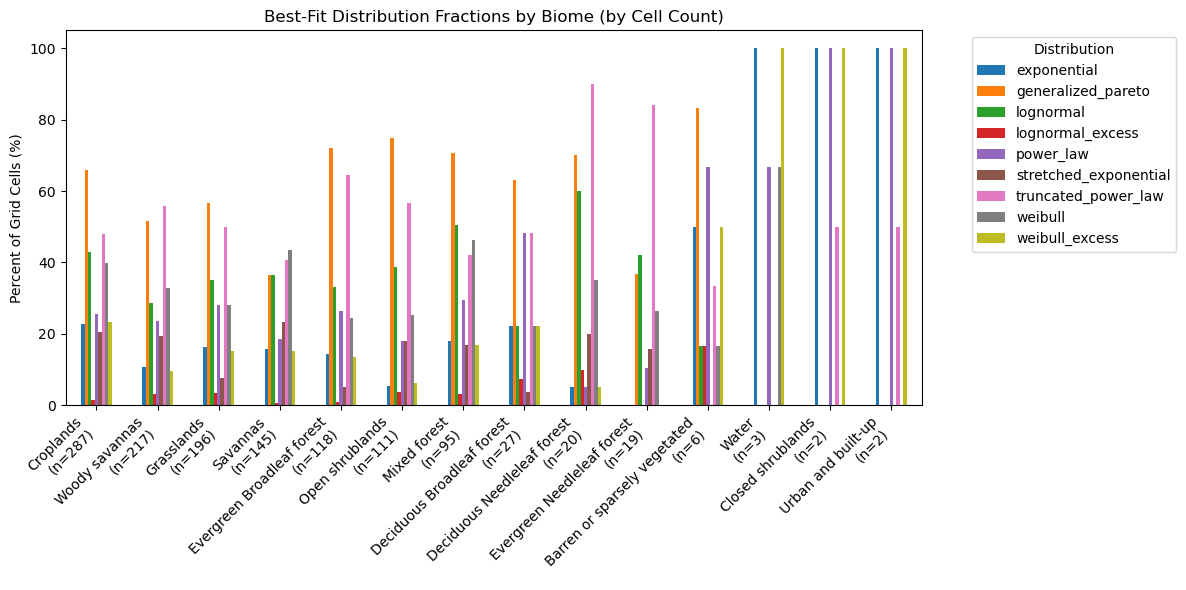

distribution                         exponential  generalized_pareto  \
Croplands\n(n=287)                     22.648084           65.853659   
Woody savannas\n(n=217)                10.599078           51.612903   
Grasslands\n(n=196)                    16.326531           56.632653   
Savannas\n(n=145)                      15.862069           36.551724   
Evergreen Broadleaf forest\n(n=118)    14.406780           72.033898   
Open shrublands\n(n=111)                5.405405           74.774775   
Mixed forest\n(n=95)                   17.894737           70.526316   
Deciduous Broadleaf forest\n(n=27)     22.222222           62.962963   
Deciduous Needleleaf forest\n(n=20)     5.000000           70.000000   
Evergreen Needleleaf forest\n(n=19)     0.000000           36.842105   
Barren or sparsely vegetated\n(n=6)    50.000000           83.333333   
Water\n(n=3)                          100.000000            0.000000   
Closed shrublands\n(n=2)              100.000000            0.000000   
Urban and built-up\n(n=2)             100.000000            0.000000   

distribution                         lognormal  lognormal_excess   power_law  \
Croplands\n(n=287)                   42.857143          1.393728   25.435540   
Woody savannas\n(n=217)              28.571429          3.225806   23.502304   
Grasslands\n(n=196)                  35.204082          3.571429   28.061224   
Savannas\n(n=145)                    36.551724          0.689655   18.620690   
Evergreen Broadleaf forest\n(n=118)  33.050847          0.847458   26.271186   
Open shrublands\n(n=111)             38.738739          3.603604   18.018018   
Mixed forest\n(n=95)                 50.526316          3.157895   29.473684   
Deciduous Broadleaf forest\n(n=27)   22.222222          7.407407   48.148148   
Deciduous Needleleaf forest\n(n=20)  60.000000         10.000000    5.000000   
Evergreen Needleleaf forest\n(n=19)  42.105263          0.000000   10.526316   
Barren or sparsely vegetated\n(n=6)  16.666667         16.666667   66.666667   
Water\n(n=3)                          0.000000          0.000000   66.666667   
Closed shrublands\n(n=2)              0.000000          0.000000  100.000000   
Urban and built-up\n(n=2)             0.000000          0.000000  100.000000   

distribution                         stretched_exponential  \
Croplands\n(n=287)                               20.557491   
Woody savannas\n(n=217)                          19.354839   
Grasslands\n(n=196)                               7.653061   
Savannas\n(n=145)                                23.448276   
Evergreen Broadleaf forest\n(n=118)               5.084746   
Open shrublands\n(n=111)                         18.018018   
Mixed forest\n(n=95)                             16.842105   
Deciduous Broadleaf forest\n(n=27)                3.703704   
Deciduous Needleleaf forest\n(n=20)              20.000000   
Evergreen Needleleaf forest\n(n=19)              15.789474   
Barren or sparsely vegetated\n(n=6)               0.000000   
Water\n(n=3)                                      0.000000   
Closed shrublands\n(n=2)                          0.000000   
Urban and built-up\n(n=2)                         0.000000   

distribution                         truncated_power_law    weibull  \
Croplands\n(n=287)                             48.083624  39.721254   
Woody savannas\n(n=217)                        55.760369  32.718894   
Grasslands\n(n=196)                            50.000000  28.061224   
Savannas\n(n=145)                              40.689655  43.448276   
Evergreen Broadleaf forest\n(n=118)            64.406780  24.576271   
Open shrublands\n(n=111)                       56.756757  25.225225   
Mixed forest\n(n=95)                           42.105263  46.315789   
Deciduous Broadleaf forest\n(n=27)             48.148148  22.222222   
Deciduous Needleleaf forest\n(n=20)            90.000000  35.000000   
Evergreen Needleleaf forest\n(n=19)            84.210526  26.315789   
Barren

In [24]:
# Note this one uses the version of "good" fits that does not filter out fits that reduce to a simpler one
plot_distribution_fractions_cells(best_fits_gfa_no_reductions)

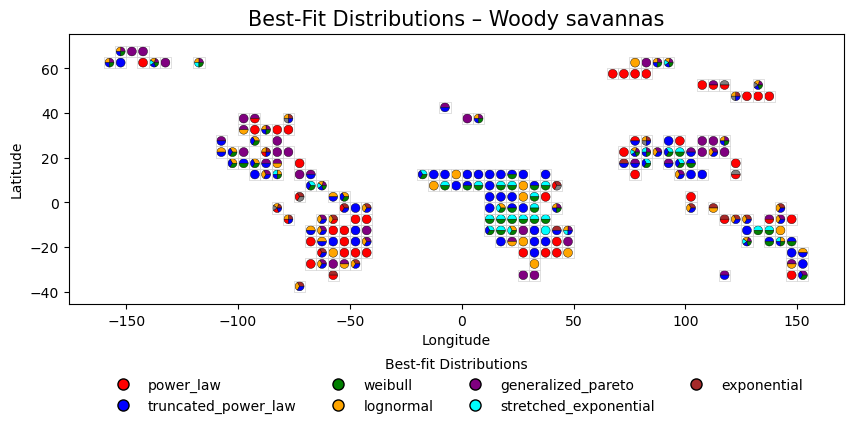

lat_bin  lon_bin                                          best_fits  \
0      -40.0    -75.0      [exponential, lognormal, truncated_power_law]   
1      -35.0    -60.0                           [exponential, power_law]   
2      -35.0     25.0                               [generalized_pareto]   
3      -35.0     30.0                               [generalized_pareto]   
4      -35.0    115.0          [generalized_pareto, truncated_power_law]   
..       ...      ...                                                ...   
207     60.0     85.0  [generalized_pareto, lognormal, truncated_powe...   
208     60.0     90.0  [generalized_pareto, lognormal, stretched_expo...   
209     65.0   -155.0  [generalized_pareto, lognormal, truncated_powe...   
210     65.0   -150.0                               [generalized_pareto]   
211     65.0   -145.0                               [generalized_pareto]   

                                              geometry  
0    POLYGON ((-70 -40, -70 -35, -75 -35, -75 -40, ...  
1    POLYGON ((-55 -35, -55 -30, -60 -30, -60 -35, ...  
2    POLYGON ((30 -35, 30 -30, 25 -30, 25 -35, 30 -...  
3    POLYGON ((35 -35, 35 -30, 30 -30, 30 -35, 35 -...  
4    POLYGON ((120 -35, 120 -30, 115 -30, 115 -35, ...  
..                                                 ...  
207      POLYGON ((90 60, 90 65, 85 65, 85 60, 90 60))  
208      POLYGON ((95 60, 95 65, 90 65, 90 60, 95 60))  
209  POLYGON ((-150 65, -150 70, -155 70, -155 65, ...  
210  POLYGON ((-145 65, -145 70, -150 70, -150 65, ...  
211  POLYGON ((-140 65, -140 70, -145 70, -145 65, ...  

[212 rows x 4 columns]

In [6]:
plot_biome_bestfit_pies(best_fits_gfa, "Woody savannas")

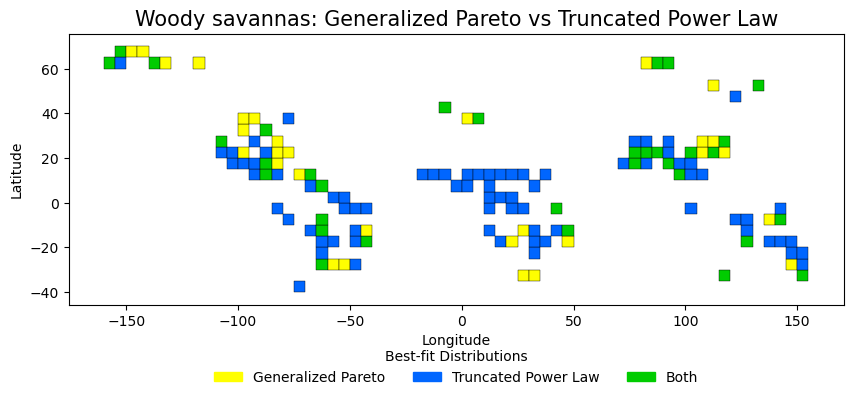

lat_bin  lon_bin                                          best_fits  \
0      -40.0    -75.0      [exponential, lognormal, truncated_power_law]   
1      -35.0     25.0                               [generalized_pareto]   
2      -35.0     30.0                               [generalized_pareto]   
3      -35.0    115.0          [generalized_pareto, truncated_power_law]   
4      -35.0    150.0  [generalized_pareto, truncated_power_law, weib...   
..       ...      ...                                                ...   
134     60.0     85.0  [generalized_pareto, lognormal, truncated_powe...   
135     60.0     90.0  [generalized_pareto, lognormal, stretched_expo...   
136     65.0   -155.0  [generalized_pareto, lognormal, truncated_powe...   
137     65.0   -150.0                               [generalized_pareto]   
138     65.0   -145.0                               [generalized_pareto]   

               color                                           geometry  
0    [0.0, 0.4, 1.0]  POLYGON ((-70 -40, -70 -35, -75 -35, -75 -40, ...  
1          [1, 1, 0]  POLYGON ((30 -35, 30 -30, 25 -30, 25 -35, 30 -...  
2          [1, 1, 0]  POLYGON ((35 -35, 35 -30, 30 -30, 30 -35, 35 -...  
3    [0.0, 0.8, 0.0]  POLYGON ((120 -35, 120 -30, 115 -30, 115 -35, ...  
4    [0.0, 0.8, 0.0]  POLYGON ((155 -35, 155 -30, 150 -30, 150 -35, ...  
..               ...                                                ...  
134  [0.0, 0.8, 0.0]      POLYGON ((90 60, 90 65, 85 65, 85 60, 90 60))  
135  [0.0, 0.8, 0.0]      POLYGON ((95 60, 95 65, 90 65, 90 60, 95 60))  
136  [0.0, 0.8, 0.0]  POLYGON ((-150 65, -150 70, -155 70, -155 65, ...  
137        [1, 1, 0]  POLYGON ((-145 65, -145 70, -150 70, -150 65, ...  
138        [1, 1, 0]  POLYGON ((-140 65, -140 70, -145 70, -145 65, ...  

[139 rows x 5 columns]

In [7]:
plot_gp_vs_tpl(best_fits_gfa, "Woody savannas")

In [8]:
plot_parameter_heatmap(best_fits_gfa, "Savannas", "truncated_power_law")

No data for truncated_power_law – truncated_power_law


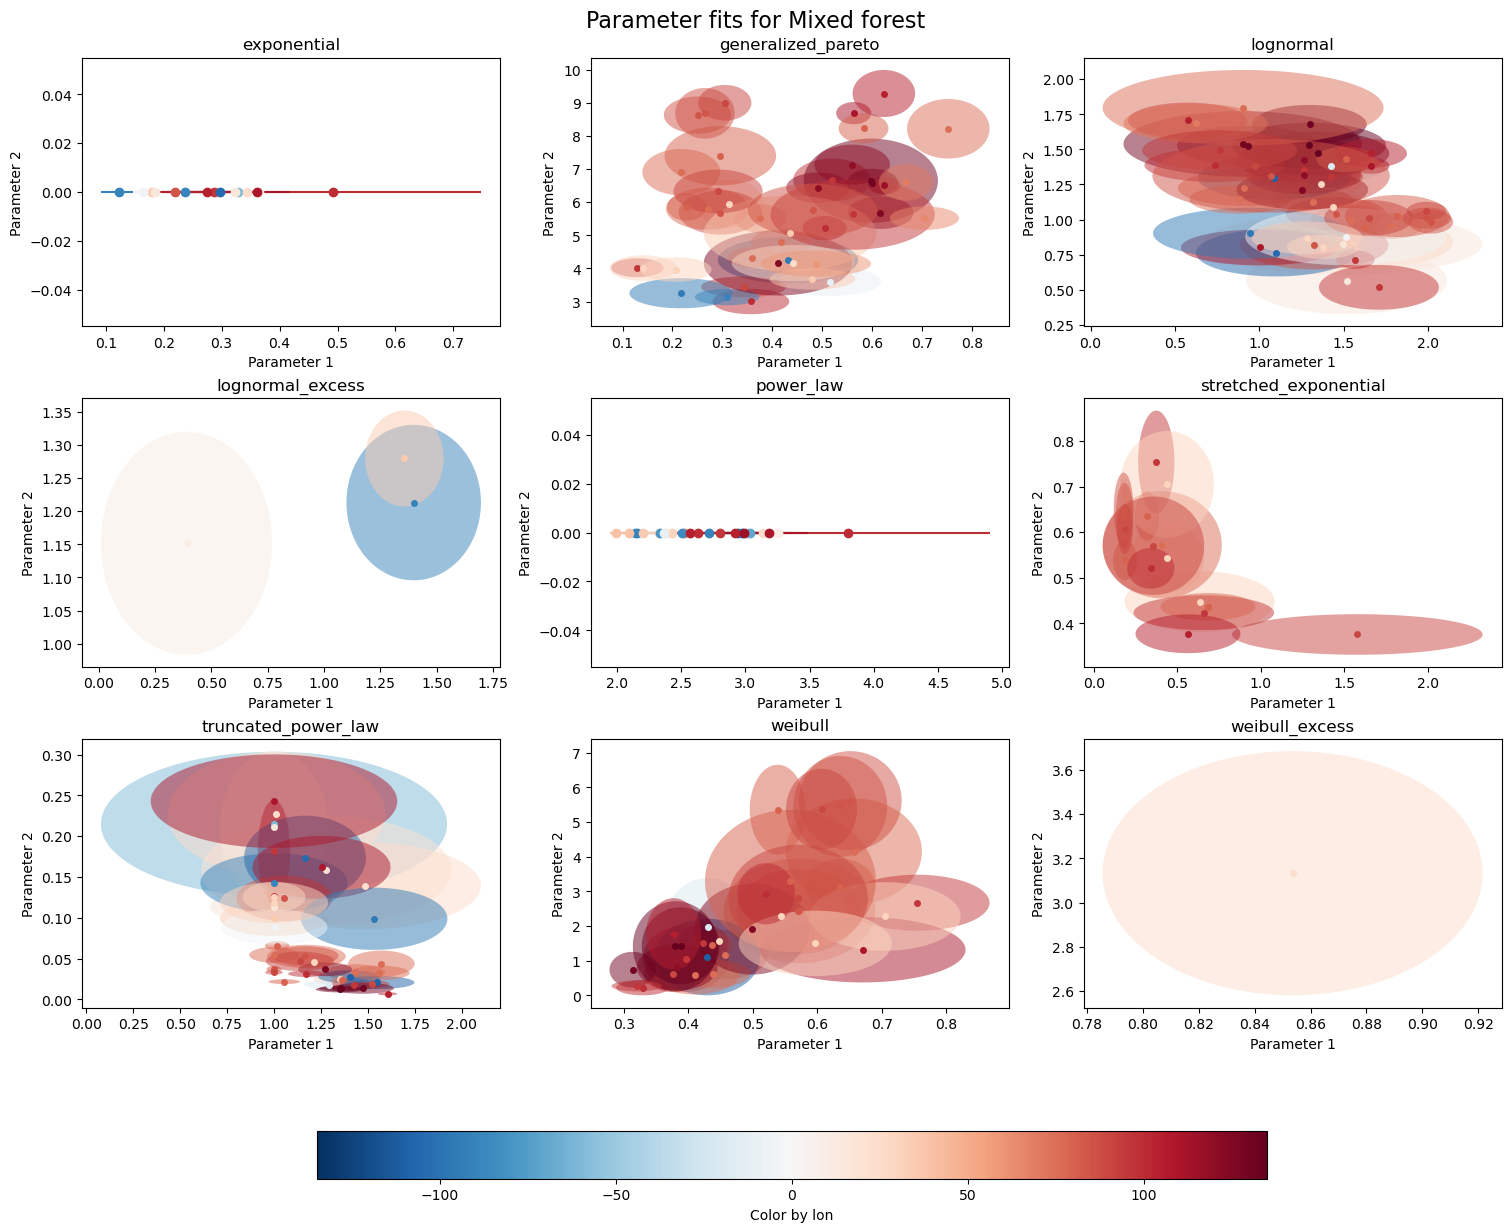

In [9]:
plot_distribution_params_biome(best_fits_gfa, "Mixed forest", color_by = "lon")

Below is the time-varying section where fires of a specified biome in each cell are binned by years (such that at least 75% of the bins have min_per_bin fires) and fit statically, then the parameters are fit with OLS to find their change over time. Many tiles do not have enough fires to be binned, so a time-varying fit is not run on them.

In [33]:
time_fits_tpl_grid = analyze_time_varying_fits_grid_single_biome(
    gfa_all,
    results_gfa,
    best_fits_gfa,
    target_biome="Grasslands",
    target_distribution="lognormal",
    xmin=4,
    R_boot=5,
    min_per_bin=400,
    max_bin_width=3
)

save_path_time_varying = f"../data/gfa_spatial_time_varying_grasslands_lognormal.pkl"
with open(save_path_time_varying, "wb") as f:
    pickle.dump(time_fits_tpl_grid, f)

Found 69 valid 5°×5° tiles for Grasslands where 'lognormal' is a good fit

🔹 Tile 1/69 → (-40.0, -75.0)
⚠️ No bin width satisfied ≥75% valid bins with ≥400 fires above xmin=4.

🔹 Tile 2/69 → (-35.0, -60.0)
⚠️ No bin width satisfied ≥75% valid bins with ≥400 fires above xmin=4.

🔹 Tile 3/69 → (-30.0, -65.0)
Using 2-year bins (86% valid; ≥400 above xmin=4): [(2003, 2004), (2005, 2006), (2007, 2008), (2009, 2010), (2011, 2012), (2015, 2016)]
there are 1232 points above xmin 4.0 km^2
there are 798 points above xmin 4.0 km^2
there are 1140 points above xmin 4.0 km^2
there are 686 points above xmin 4.0 km^2
there are 778 points above xmin 4.0 km^2
there are 485 points above xmin 4.0 km^2

🔹 Tile 4/69 → (-30.0, -60.0)
Using 3-year bins (80% valid; ≥400 above xmin=4): [(2003, 2005), (2006, 2008), (2009, 2011), (2012, 2014)]
there are 873 points above xmin 4.0 km^2
there are 710 points above xmin 4.0 km^2
there are 429 points above xmin 4.0 km^2
there are 408 points above xmin 4.0 km^2

🔹 Tile 

In [34]:
df_tv = time_fits_grid_to_df(time_fits_tpl_grid)
df_tv.head()

lat_bin  lon_bin  p1_intercept  p1_slope  p1_se_intercept  p1_se_slope  \
0    -30.0    -65.0    -18.306470  0.009020       127.201906     0.063321   
1    -30.0    -60.0    181.059873 -0.090516       499.713605     0.248799   
2    -15.0    -70.0    173.610266 -0.086183       233.258481     0.115970   
3      0.0    -75.0    -34.610787  0.017091       101.617224     0.050568   
4      5.0    -70.0     65.947047 -0.032752        54.002417     0.026874   

   p1_sig  p2_intercept  p2_slope  p2_se_intercept  p2_se_slope  p2_sig  
0       0      9.619538 -0.004070        36.779134     0.018309       0  
1       0    -11.679581  0.006544       104.192611     0.051876       0  
2       0      1.970188 -0.000112        52.856747     0.026279       0  
3       0     44.185112 -0.021165        37.896269     0.018859       0  
4       0    -14.191210  0.007934        22.206787     0.011051       0

Matched 2 time-varying fits out of 43 tiles.
Figure saved to /Users/lukevonkapff/Desktop/open shrublands_lognormal_map.png


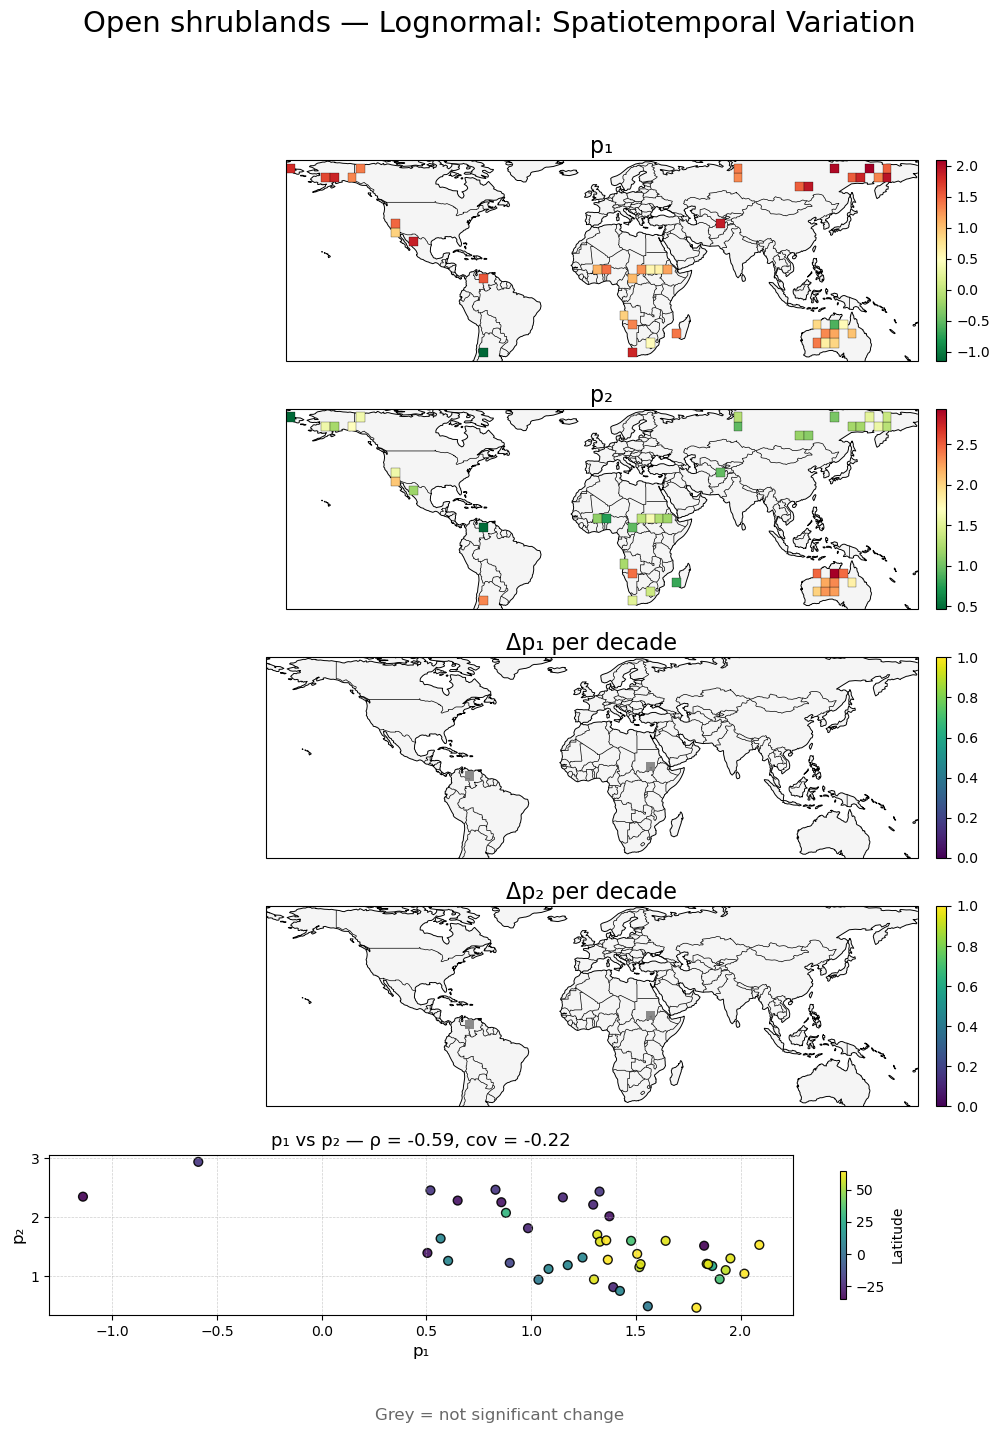

In [35]:
plot_parameter_heatmap(
    best_fits_gfa,
    df_tv,
    biome="Open shrublands",
    distribution="lognormal"
)

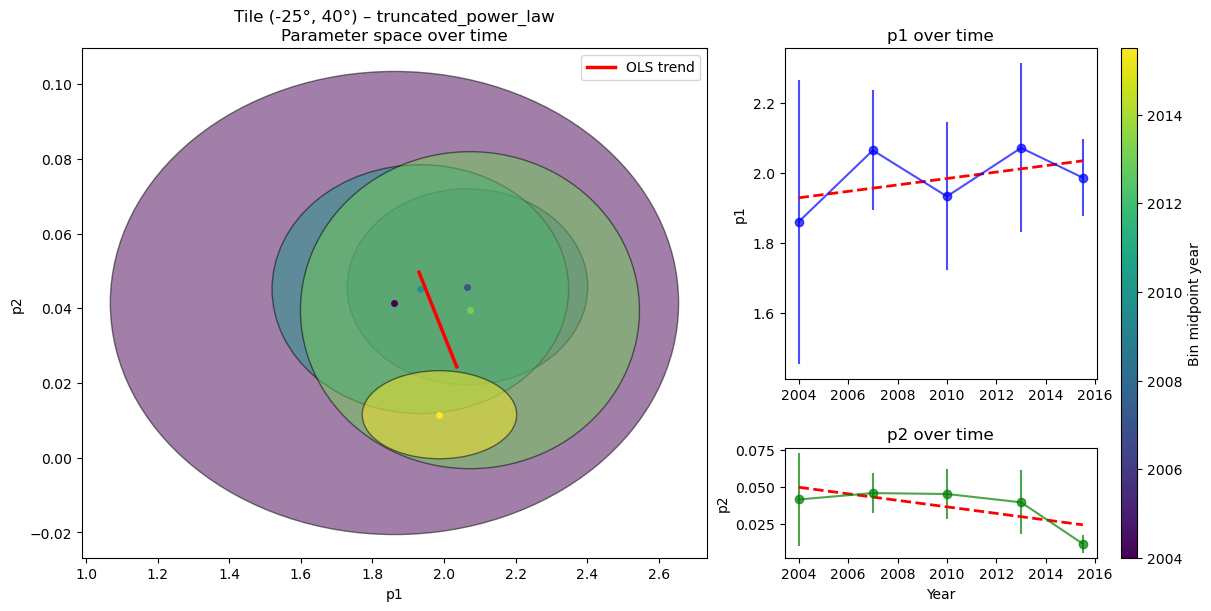

In [13]:
example_tile = list(time_fits_tpl_grid.keys())[0]
plot_timevary_param_space_grid(time_fits_tpl_grid, example_tile)